<h2 style="text-align:center;">K-Nearest Neighbors (KNN) Regression</h2>

The **K-Nearest Neighbors (KNN)** algorithm is one of the simplest machine learning models.  
It does not assume any functional relationship between the independent (X) and dependent (y) variables,  
making it a **non-parametric** and **instance-based learning** method.  

In KNN Regression:  
- The prediction for a new data point is based on the **average of the target values of its k nearest neighbors**.  
- The closeness (nearness) is determined using **distance metrics** (commonly Euclidean).  
- Instead of fitting a line (like Linear Regression) or a curve (like Polynomial Regression),  
  KNN relies on the **distribution of data points**.


<h3>📌 Key Concepts of KNN Regression</h3>

1. **Distance Metric**  
   - Determines which points are considered “neighbors”.  
   - Common: Euclidean Distance.  

2. **Number of Neighbors (k)**  
   - Small `k` → Model is very flexible but may overfit (too noisy).  
   - Large `k` → Model is smoother but may underfit.  

3. **Weights**  
   - `uniform`: All neighbors have equal influence.  
   - `distance`: Closer neighbors have more influence.  

4. **Feature Scaling**  
   - Since KNN relies on distances, features must be scaled (Standardization or MinMax).  

5. **Advantages**  
   - Simple, intuitive, no training assumptions.  
   - Works well with small datasets.  

6. **Disadvantages**  
   - Computationally expensive on large datasets.  
   - Sensitive to irrelevant features & scaling.  


## 3. Practical Implementation — KNN Regression

In this section we will:
1. Import required libraries and load the dataset.  
2. Scale features (important for distance-based models).  
3. Train KNN regressor and make a prediction.  
4. Evaluate model performance (R²).  
5. Visualize predictions vs actuals.  
6. Save the trained model + scalers to a single `.pkl` bundle for deployment.


In [4]:
# ---------------------------
# 3.a Import libraries & load data
# ---------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Adjust path if your notebook is in a different folder
df = pd.read_csv("../data/emp_sal.csv")
df.head()


,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000


### Notes
- `X` is the **Position Level** (kept as 2D array for scikit-learn).  
- `y` is **Salary** (1D array for training, but we will scale it as 2D).


In [5]:
# ---------------------------
# 3.b Prepare features and target
# ---------------------------

X = df.iloc[:, 1:2].values   # shape (n_samples, 1)
y = df.iloc[:, 2].values     # shape (n_samples,)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (10, 1)
y shape: (10,)


### 3.c Feature scaling
KNN relies on distances — always scale features. We will scale both `X` and `y`:
- `scaler_X` for input features (Position Level)
- `scaler_y` for target (Salary) — so predictions can be inverse-transformed back to original units


In [6]:
# ---------------------------
# Scale X and y
# ---------------------------
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)                 # shape (n_samples, 1)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1)).ravel()  # shape (n_samples,)

# quick sanity check
print("X_scaled mean/var:", X_scaled.mean(), X_scaled.std())
print("y_scaled mean/var:", y_scaled.mean(), np.std(y_scaled))


X_scaled mean/var: -6.661338147750939e-17 1.0
y_scaled mean/var: -4.4408920985006264e-17 0.9999999999999998


### 3.d Train KNN Regression
We train a KNN regressor with a default `k=3` (you can tune `k` later).
- `weights='uniform'` treats all neighbors equally.


In [7]:
# ---------------------------
# Train KNN model
# ---------------------------
k = 3
knn_model = KNeighborsRegressor(n_neighbors=k, weights="uniform")
knn_model.fit(X_scaled, y_scaled)

print(f"KNN model trained (k={k})")


KNN model trained (k=3)


### 3.e Single prediction (example)
Predict salary for **Position Level = 6.5**:
- scale the input (use `scaler_X.transform`)
- predict on scaled input
- inverse-transform the predicted scaled target back to original salary scale


In [8]:
# ---------------------------
# Predict for position level = 6.5
# ---------------------------
test_level = 6.5
X_test_scaled = scaler_X.transform(np.array([[test_level]]))     # shape (1,1)
y_test_pred_scaled = knn_model.predict(X_test_scaled)            # shape (1,)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1,1))  # shape (1,1)

print(f"KNN Prediction for level {test_level}: {y_test_pred[0,0]:,.2f}")


KNN Prediction for level 6.5: 216,666.67


### 3.f Model evaluation (R²)
We compute R² on the training set (since the dataset is small).  
Note: For real projects, use train/test or cross-validation.


In [10]:
# ---------------------------
# Evaluate model on training data
# ---------------------------
y_train_pred_scaled = knn_model.predict(X_scaled)                 # scaled predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1,1))

r2 = r2_score(y, y_train_pred)
print(f"KNN Model R² (train): {r2:.4f}")


KNN Model R² (train): 0.7874


### 3.g Visualization — actual vs predicted
Plot the original data (scatter) and model predictions (sorted by X for a smooth curve).


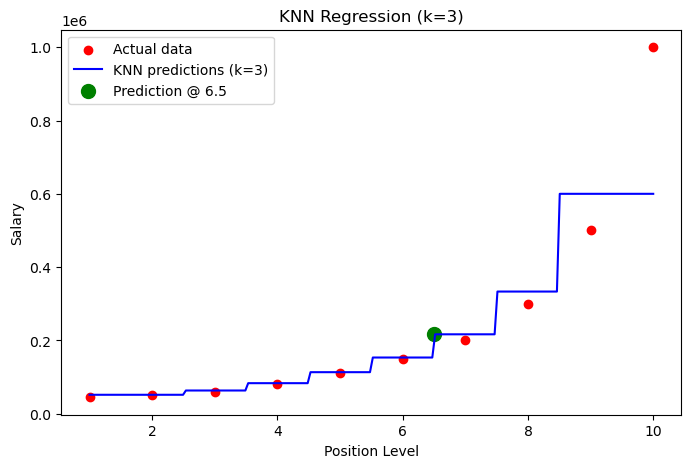

In [11]:
# ---------------------------
# Visualization
# ---------------------------
# Create smooth curve by using sorted X values
X_grid = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
X_grid_scaled = scaler_X.transform(X_grid)
y_grid_pred_scaled = knn_model.predict(X_grid_scaled)
y_grid_pred = scaler_y.inverse_transform(y_grid_pred_scaled.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_grid, y_grid_pred, color='blue', label=f'KNN predictions (k={k})')
plt.scatter(test_level, y_test_pred, color='green', s=100, label=f'Prediction @ {test_level}')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('KNN Regression (k={})'.format(k))
plt.legend()
plt.show()


### 3.h Optional: quick `k`-tuning table
Try several `k` values and observe R². This is a simple grid search to pick a reasonable `k`.


In [12]:
# ---------------------------
# Optional: Evaluate R² for a range of k values
# ---------------------------
results = []
for k_try in range(1, 11):
    model_k = KNeighborsRegressor(n_neighbors=k_try, weights="uniform")
    model_k.fit(X_scaled, y_scaled)
    y_k_scaled = model_k.predict(X_scaled)
    y_k = scaler_y.inverse_transform(y_k_scaled.reshape(-1,1))
    r2_k = r2_score(y, y_k)
    results.append((k_try, r2_k))

results_df = pd.DataFrame(results, columns=['k', 'r2'])
results_df


,k,r2
0,1,1.000000
1,2,0.895544
2,3,0.787409
3,4,0.679615
4,5,0.564919
5,6,0.487796
6,7,0.379763
7,8,0.300790
8,9,0.191143
9,10,0.000000


### 3.i Save the model + scalers to a single `.pkl` bundle
This lets the Streamlit app load one file and do prediction correctly.


In [13]:
# ---------------------------
# Save model bundle as pickle
# ---------------------------
import pickle, os
os.makedirs("../models", exist_ok=True)

model_bundle = {
    "scaler_X": scaler_X,
    "scaler_y": scaler_y,
    "knn_model": knn_model
}

with open("../models/knn_model.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("✅ Saved knn_model.pkl in ../models/")


✅ Saved knn_model.pkl in ../models/
